In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Cleaned Datasets

zomato = pd.read_csv("zomato_cleaned.csv")
cities = pd.read_csv("cities_cleaned.csv")


In [3]:
merged = zomato.merge(
    cities,
    on='city_clean',
    how='left'
)


In [4]:
merged.to_csv("merged.csv", index=False)

In [5]:
merged.shape

(9542, 13)

In [6]:
merged.sample(2)

,restaurant_name,city,cuisines,avg_cost_for_two,price_range,rating,votes,online_delivery,table_booking,city_clean,state_clean,population,city_tier
7849,Shagun,New Delhi,"Chinese, Thai, Tibetan, Japanese",800,2,3.9,419,Yes,No,delhi,delhi,9879172.0,Tier 1
1589,Hotel Rajvanshi Restaurant,Gurgaon,"North Indian, Chinese",600,2,3.3,25,No,No,gurgaon,haryana,173542.0,Tier 3


In [7]:
merged = pd.read_csv("merged.csv")

In [8]:
# Success level

merged['success_level'] = pd.cut(
    merged['rating'],
    bins=[0, 3.5, 4.2, 5],
    labels=['Low', 'Medium', 'High']
)


In [9]:
merged.sample(3)

,restaurant_name,city,cuisines,avg_cost_for_two,price_range,rating,votes,online_delivery,table_booking,city_clean,state_clean,population,city_tier,success_level
155,Lucianos Italian Restaurant,Boise,"Italian, Seafood, Vegetarian",25,2,4.4,360,No,No,boise,NaN,NaN,NaN,High
3657,Cafe Diva,New Delhi,"European, Italian",2200,4,3.9,347,Yes,Yes,delhi,delhi,9879172.0,Tier 1,Medium
1028,Biryani Bot,Faridabad,Biryani,200,1,0.0,0,No,No,faridabad,haryana,1055938.0,Tier 1,NaN


In [10]:
# City-level success summary

city_success = merged.groupby('city_tier').agg({
    'rating': 'mean',
    'votes': 'mean',
    'restaurant_name': 'count'
}).reset_index()

city_success.head()

,city_tier,rating,votes,restaurant_name
0,Tier 1,2.520931,146.924805,6144
1,Tier 2,3.692973,214.605405,185
2,Tier 3,2.379518,96.024096,2241


In [11]:
tier_success_dist = (
    pd.crosstab(
        merged['city_tier'],
        merged['success_level'],
        normalize='index'
    ) * 100
).round(1)

tier_success_dist

success_level,Low,Medium,High
city_tier,,,
Tier 1,66.8,28.8,4.4
Tier 2,38.8,46.4,14.8
Tier 3,70.4,27.2,2.4


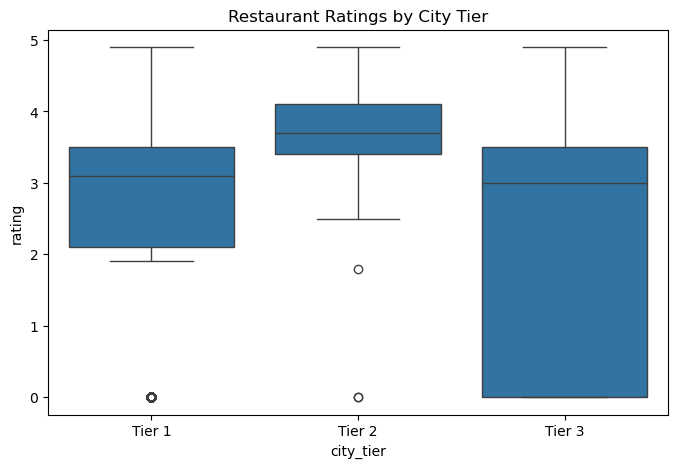

In [12]:
# Rating distribution (visual)

plt.figure(figsize=(8,5))
sns.boxplot(x='city_tier', y='rating', data=merged)
plt.title('Restaurant Ratings by City Tier')
plt.show()


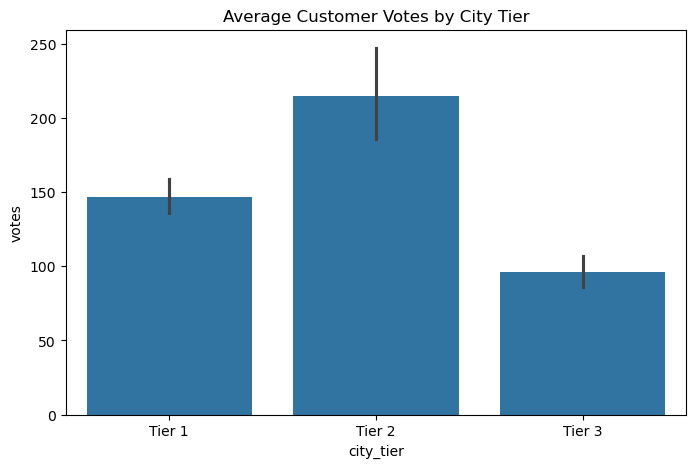

In [13]:
# Engagement comparison

plt.figure(figsize=(8,5))
sns.barplot(x='city_tier', y='votes', data=merged, estimator='mean')
plt.title('Average Customer Votes by City Tier')
plt.show()


## 📌 Conclusion

City size has a clear impact on restaurant success.

- Tier 2 cities outperform both Tier 1 and Tier 3 cities in:
  - Average ratings
  - Customer engagement (votes)
  - Percentage of high-success restaurants

- Tier 1 cities face heavy competition, reducing average success.
- Tier 3 cities show lower engagement and inconsistent performance.

### ✅ Final Answer:
Mid-sized (Tier 2) cities offer the best balance between demand and competition, making them the most favorable for restaurant success.
